### 游戏业务数据分析常分析如图所示的用户行为数据：

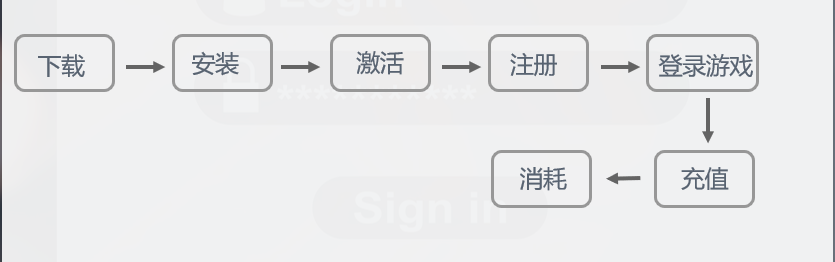

本例是对用户从安装——注册的行为数据进行统计分析

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
az = pd.read_excel('数据源整合.xlsx',sheet_name='安装信息')
zc = pd.read_excel('数据源整合.xlsx',sheet_name='注册信息')

In [14]:
print("查看安装信息：")
az.head()

查看安装信息：


,安装时间,渠道,子渠道,地区,WIFI,用户唯一ID,系统,机型,操作系统版本
0,2020-04-26 15:59:27,渠道A,site01,地区A,True,1587916759000-8355351393884172615,android,samsung-SM-N900,5
1,2020-04-26 15:58:27,渠道A,site02,地区A,False,1587916702141-689636393710525296,android,samsung-SM-N960F,10
2,2020-04-26 15:56:57,渠道A,site01,地区A,False,1587916613722-2703192501000635621,android,samsung-SM-A7050,9
3,2020-04-26 15:50:55,渠道A,site03,地区A,True,1587916250955-4061104808165063458,android,OPPO-CPH1721,7
4,2020-04-26 15:49:42,渠道A,site04,地区A,True,1587916177009-3388800810186375808,android,HUAWEI-LYA-L29,9


In [15]:
print("查看注册信息：")
zc.head()

查看注册信息：


,用户类型,账号名称,安装时间,注册时间,注册渠道,子站,用户唯一ID,注册游戏,系统,机型,地区
0,new,code03,2020-04-19 23:58:18,2020-04-20 00:06:51,渠道A,site12,1587311896496-9121742265690995358,游戏A,android,SM-G887F,地区A
1,old,code15,2020-04-20 00:04:51,2020-04-20 00:22:09,渠道A,site39,1587312290514-3372644182163270448,游戏A,android,SM-A730F,地区A
2,old,code17,2020-04-20 00:18:30,2020-04-20 00:25:18,渠道A,site32,1587313106069-4890529650028494525,游戏A,android,ASUS_I001DE,地区A
3,old,code19,2020-04-20 00:20:36,2020-04-20 00:27:39,渠道A,site40,1587313233938-6534515892410501030,游戏A,android,SM-G9880,地区B
4,old,code27,2020-04-20 00:28:29,2020-04-20 00:35:35,渠道A,site40,1587313708644-1610695342336039164,游戏A,android,SM-N9500,地区B


In [16]:
print("安装信息表：")
print(az.info())
print("-"*30)
print(az.describe())
print("-"*30)
print('空值统计:\n',az.isnull().sum())
print("-"*30)
print('重复数据：',az.duplicated().sum())

安装信息表：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438 entries, 0 to 7437
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   安装时间    7438 non-null   datetime64[ns]
 1   渠道      7438 non-null   object        
 2   子渠道     7438 non-null   object        
 3   地区      7438 non-null   object        
 4   WIFI    7438 non-null   bool          
 5   用户唯一ID  7438 non-null   object        
 6   系统      7438 non-null   object        
 7   机型      7438 non-null   object        
 8   操作系统版本  7438 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 472.3+ KB
None
------------------------------
            操作系统版本
count  7438.000000
mean      7.881958
std       1.505865
min       4.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
------------------------------
空值统计:
 安装时间      0
渠道        0
子渠道       0
地区        0
WIFI      0
用户唯一ID    0
系统    

In [17]:
print("注册信息表：")
print(zc.info())
print("-"*30)
print(zc.describe())
print("-"*30)
print('空值统计:\n',zc.isnull().sum())
print("-"*30)
print('重复数据：',zc.duplicated().sum())

注册信息表：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户类型    5992 non-null   object
 1   账号名称    5992 non-null   object
 2   安装时间    5992 non-null   object
 3   注册时间    5992 non-null   object
 4   注册渠道    5992 non-null   object
 5   子站      5992 non-null   object
 6   用户唯一ID  5992 non-null   object
 7   注册游戏    5992 non-null   object
 8   系统      5992 non-null   object
 9   机型      5992 non-null   object
 10  地区      5992 non-null   object
dtypes: object(11)
memory usage: 515.1+ KB
None
------------------------------
        用户类型      账号名称                 安装时间                 注册时间  注册渠道  \
count   5992      5992                 5992                 5992  5992   
unique     2      5944                 5555                 5951     2   
top      old  code2577  2020-03-17 08:05:22  2020-04-22 02:29:26   渠道B   
freq    3022         5                   33

In [18]:
print('安装信息表的安装时间范围：',az['安装时间'].min(),az['安装时间'].max())
print('注册信息表的安装时间范围：',zc['安装时间'].min(),zc['安装时间'].max())

安装信息表的安装时间范围： 2020-04-19 16:04:54 2020-04-26 15:59:27
注册信息表的安装时间范围： 2020-02-20 13:21:31 2020-04-26 23:44:39


因数据不对齐，为了方便分析，选择2020/4/20-2020/4/26的数据

In [19]:
az = az[az['安装时间'] > '2020-04-19 23:59:59']
zc = zc[zc['安装时间'] > '2020-04-19 23:59:59']

print('安装信息表的安装时间范围：',az['安装时间'].min(),az['安装时间'].max())
print('注册信息表的安装时间范围：',zc['安装时间'].min(),zc['安装时间'].max())

安装信息表的安装时间范围： 2020-04-20 00:02:15 2020-04-26 15:59:27
注册信息表的安装时间范围： 2020-04-20 00:04:51 2020-04-26 23:44:39


In [20]:
uid = az['用户唯一ID']
zc = zc[zc['用户唯一ID'].isin(uid)]

In [21]:
print('安装信息：',az.shape)
print('注册信息：',zc.shape)

安装信息： (7282, 9)
注册信息： (5125, 11)


In [22]:
print('注册信息重复ID：',zc['用户唯一ID'].duplicated().sum())
# 去重
zc = zc.drop_duplicates('用户唯一ID')
print('去重后：',zc.shape)

注册信息重复ID： 207
去重后： (4918, 11)


## 安装信息分析

### 安装人数、注册人数、激活率

激活率 = 激活人数 / 安装人数 （这里激活人数 = 注册人数）

In [28]:
az_num = az.shape[0]
zc_num = zc.shape[0]
activation_rate ="%.2f%%"%(zc_num/az_num *100)
print('安装人数：', az_num)
print('注册人数：', zc_num)
print('激活率：', activation_rate)

安装人数： 7282
注册人数： 4918
激活率： 67.54%


日安装量、安装渠道、TOP15子渠道、安装地区、是否WiFi安装、安装的手机类型统计TOP15、系统版本

In [49]:
# 日安装量
az['安装日期'] = az['安装时间'].dt.date
print('日安装用户数：\n',az.groupby('安装日期').count().用户唯一ID)


日安装用户数：
 安装日期
2020-04-20     947
2020-04-21     912
2020-04-22    1045
2020-04-23    1022
2020-04-24     915
2020-04-25    1278
2020-04-26    1163
Name: 用户唯一ID, dtype: int64


In [52]:
# 渠道安装量
print('渠道安装用户数：\n',az.groupby('渠道').count().用户唯一ID)

渠道安装用户数：
 渠道
渠道A    1802
渠道B    5480
Name: 用户唯一ID, dtype: int64


In [62]:
# Top15 子渠道
print('Top 15 子渠道：\n',az.groupby('子渠道').count().用户唯一ID.sort_values(ascending=False)[:15])

Top 15 子渠道：
 子渠道
site251    1075
site249    1048
site250    1043
site247     458
site248     457
site253     430
site254     305
site258     274
site252     209
site11      207
site12      200
site03      154
site01      138
site255     115
site256      59
Name: 用户唯一ID, dtype: int64


In [68]:
# 安装地区
print('地区安装用户数：\n',az.groupby('地区').count().用户唯一ID)

地区安装用户数：
 地区
地区A    5663
地区B    1543
地区C      76
Name: 用户唯一ID, dtype: int64


In [73]:
# 是否wifi安装
print('是否wifi安装：\n',az.groupby('WIFI').count().用户唯一ID)

是否wifi安装：
 WIFI
False    3344
True     3938
Name: 用户唯一ID, dtype: int64


In [88]:
# 安装的手机品牌统计TOP15
az['手机品牌'] = az['机型'].str.lower().str.split('-').str[0]

print('安装的手机品牌统计TOP15：\n',az.groupby('手机品牌').count().用户唯一ID.sort_values(ascending=False)[:15])

安装的手机品牌统计TOP15：
 手机品牌
samsung    2577
oppo       1125
huawei      726
xiaomi      610
asus        576
htc         281
sony        275
vivo        245
lge          87
galaxy       78
realme       65
honor        57
redmi        53
nokia        51
xperia       45
Name: 用户唯一ID, dtype: int64


In [93]:
# 系统版本
print('系统：\n',az['系统'].value_counts())
print('系统版本：\n',az.groupby('操作系统版本').count().用户唯一ID)


系统：
 android    7282
Name: 系统, dtype: int64
系统版本：
 操作系统版本
4       83
5      313
6     1434
7      925
8     1251
9     2407
10     869
Name: 用户唯一ID, dtype: int64


## 注册信息分析

每日注册人数、用户类型、注册时段、激活时间、日新增新用户统计

In [98]:
# 每日注册人数
zc['注册日期'] = pd.to_datetime(zc['注册时间']).dt.date
print('每日注册人数：\n',zc.groupby('注册日期').count().用户唯一ID)

每日注册人数：
 注册日期
2020-04-20    532
2020-04-21    579
2020-04-22    648
2020-04-23    731
2020-04-24    635
2020-04-25    864
2020-04-26    929
Name: 用户唯一ID, dtype: int64


In [99]:
# 用户类型
print('用户类型：\n',zc['用户类型'].value_counts())

用户类型：
 new    2565
old    2353
Name: 用户类型, dtype: int64


Text(0.5, 1.0, '各时段的注册用户量')

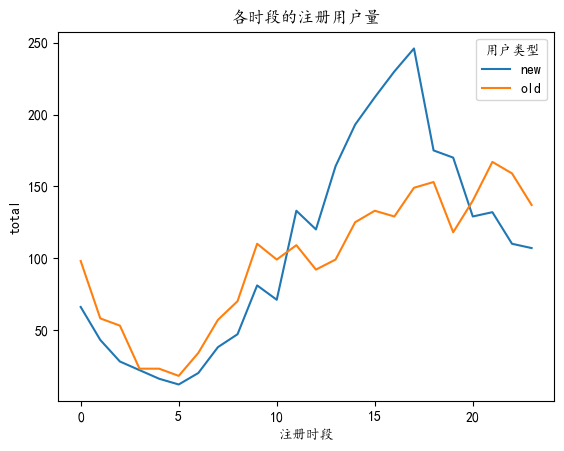

In [120]:
# 加入中文
import matplotlib
matplotlib.rc("font",family='KaiTi')

zc['注册时段'] = pd.to_datetime(zc['注册时间']).dt.hour
zc_by_hour = zc.groupby(['用户类型','注册时段']).count().用户唯一ID.reset_index(name='total')
sns.lineplot(data=zc_by_hour,x='注册时段',y='total',hue='用户类型')
plt.title('各时段的注册用户量')

In [146]:
# 激活时间
zc['激活时间'] = pd.to_datetime(zc['注册时间']).dt.day - pd.to_datetime(zc['安装时间']).dt.day
zcap = zc.groupby('激活时间').count().用户唯一ID.reset_index(name='total')
zcap['percent_az'] = zcap['total'] / az.shape[0]
zcap['percent_zc'] = zcap['total'] / zc.shape[0]
print("激活时间：\n",zcap)

print('\n有4655人选择在当天激活，占安装人数中的63.9%，占整体注册人数中的94.6%，有'+'%.2f%%'%(100*(1-sum(zcap['percent_az'])))+'的用户没有在7天内激活注册')

激活时间：
    激活时间  total  percent_az  percent_zc
0     0   4655    0.639247    0.946523
1     1    208    0.028564    0.042294
2     2     33    0.004532    0.006710
3     3     16    0.002197    0.003253
4     4      3    0.000412    0.000610
5     5      1    0.000137    0.000203
6     6      2    0.000275    0.000407

有4655人选择在当天激活，占安装人数中的63.9%，占整体注册人数中的94.6%，有32.46%的用户没有在7天内激活注册


In [152]:
# 日新增新用户数
nzc = zc[zc['用户类型']=='new']
print('每日新增用户数\n',nzc.groupby('注册日期').count().用户唯一ID)


每日新增用户数
 注册日期
2020-04-20    296
2020-04-21    298
2020-04-22    343
2020-04-23    375
2020-04-24    324
2020-04-25    447
2020-04-26    482
Name: 用户唯一ID, dtype: int64


Text(0.5, 1.0, '每日新增用户数')

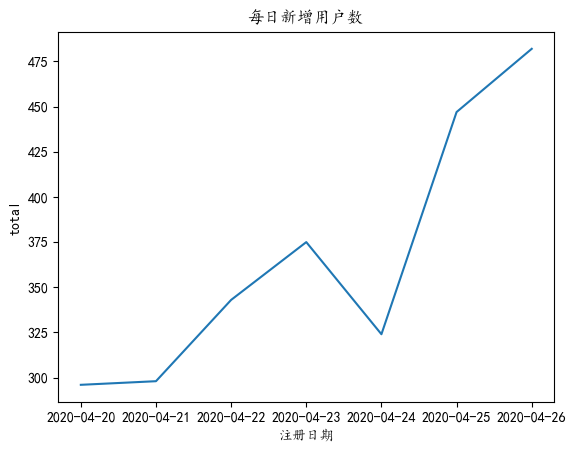

In [155]:
nzc_df = nzc.groupby('注册日期').count().用户唯一ID.reset_index(name='total')
sns.lineplot(data=nzc_df,x='注册日期',y='total')
plt.title('每日新增用户数')